<a href="https://colab.research.google.com/github/sammeee/Detection-of-Fraudulent-Transaction-Using-Deep-Learning/blob/main/card_transact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#      **Detection of Fraudulent Transaction Using Deep Learning**

#### Here, we try to use deep learning to model an algorithm that will detect fraudulent card transactions. The dataset is the card transaction dataset provided by Kaggle. The dataset has 284807 rows and 31 columns. This means we have 284807 transactions. One of the columns is the label column. This column tells us whether a particular transaction is fraudulent or not. A non-fraudulent transaction is labelled 0 while a fraudulent one is labelled 1. Of the 284807 transactions, 284315 are non-fraudulent while 492 are. This means over 99% of the transactions are non-fraudulent. This is a heavily biased dataset. Our goal is to buld a model that will detect fraudulent transactions.
####
#### We used oversampling method here. We used ADASYN in the place of SMOTE as the former is an improved version of the latter and should give us a more reliable result. We got a nearly perfect result as our Precision is approximately 1 and our Recall is 1.

### Importing Dependencies

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
from imblearn.over_sampling import ADASYN
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

### Importing the Dataset from Kaggle

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'zammie'
os.environ['KAGGLE_KEY'] = 'd19002a9b4af23cf1cdb8d2c682f412b'
!kaggle datasets download -d mlg-ulb/creditcardfraud

100% 66.0M/66.0M [00:04<00:00, 24.8MB/s]
100% 66.0M/66.0M [00:04<00:00, 16.5MB/s]


In [ ]:
# Extracting the files
with ZipFile('/content/creditcardfraud.zip', 'r') as zip:
  zip.extractall()

In [ ]:
dataset = pd.read_csv('/content/creditcard.csv')

In [ ]:
# checking out the first five rows of the dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Carrying Out Quick Exploratory Data Analysis

In [ ]:
dataset['Class'].unique()

array([0, 1])

In [ ]:
# checing out the number of fraudulent and non-fraudulent transactions
# A non-fraudulent transaction is labelled 0
# A fraudulent transaction is labelled 1

dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# We have no missing values. Also, all values are in float

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset.shape

(284807, 31)

### Splitting the Dataset into Features and Target Variables

In [ ]:
X = dataset.drop('Class', axis=1)
y = dataset.Class

### Employing ADASYN

In [ ]:
ada = ADASYN()

In [ ]:
X_new, y_new = ada.fit_resample(X, y)

In [ ]:
# the minority class has been increased through over-sampling from 492 to 284298 

y_new.value_counts()

0    284315
1    284298
Name: Class, dtype: int64

In [ ]:
X_new.shape, X.shape

((568613, 30), (284807, 30))

### Splitting the Over-sampled Dataset into Train, Validation and Test Datasets

##### The splitting is done twice: 
##### First, the dataset is split into ***train*** and  **'*chunk* '** datasets. 
##### Then, the **'*chunk* '** dataset is split into ***validation*** and ***test*** datasets.

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X_new, y_new, train_size=0.8, random_state=0, stratify = y_new)

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=1, stratify = y_rem)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((454890, 30), (56861, 30), (56862, 30))

### Preprocessing the Datasets






In [ ]:
# The feature variables for the train, validation and test datasets are preprocessed using Standard Scaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

In [ ]:
# the target variable for train, valdation and test datasets are converted to arrays

y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
y_train

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
# Reshaping the datasets

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape, X_valid.shape

((454890, 30, 1), (56861, 30, 1))

### Importing the Model

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(Conv1D(32, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
#model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 32)            2080      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 32)           128       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Training the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
14216/14216 [==============================] - 98s 6ms/step - loss: 0.0341 - accuracy: 0.9884 - val_loss: 0.0113 - val_accuracy: 0.9966
Epoch 2/20
14216/14216 [==============================] - 90s 6ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0060 - val_accuracy: 0.9981
Epoch 3/20
14216/14216 [==============================] - 90s 6ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0045 - val_accuracy: 0.9988
Epoch 4/20
14216/14216 [==============================] - 90s 6ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0038 - val_accuracy: 0.9989
Epoch 5/20
14216/14216 [==============================] - 91s 6ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9990
Epoch 6/20
14216/14216 [==============================] - 90s 6ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0027 - val_accuracy: 0.9992
Epoch 7/20
14216/14216 [==============================] - 91s 6ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0

### Learning from the Learning Curves

In [ ]:
df = pd.DataFrame(history.history)

In [ ]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.034106,0.988410,0.011334,0.996606
1,0.009408,0.997232,0.006047,0.998136
2,0.005992,0.998263,0.004470,0.998751
3,0.004518,0.998740,0.003755,0.998874
4,0.003690,0.998989,0.003227,0.999033


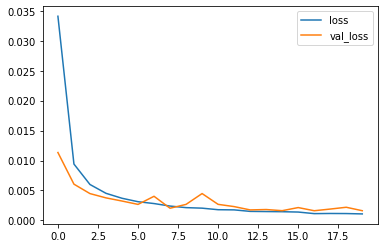

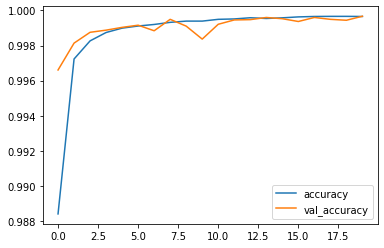

In [ ]:
df.loc[:, ['loss', 'val_loss']].plot()
plt.show()
df.loc[:, ['accuracy', 'val_accuracy']].plot()


### Evaluating the Model Using Precision and Recall

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
yhat = model.predict(X_test)

1777/1777 [==============================] - 4s 2ms/step


In [ ]:
yhat

array([[1.        ],
       [0.9999999 ],
       [0.9999976 ],
       ...,
       [0.9999982 ],
       [0.99999833],
       [0.99999964]], dtype=float32)

In [ ]:
y_pred = [0 if i<0.5 else 1 for i in yhat]

In [ ]:
print(y_pred[:20])

[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]


In [ ]:
print(y_test[:20])

[1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0]


In [ ]:
pre.update_state(y_test, y_pred)
re.update_state(y_test, y_pred)

In [ ]:
print('Precision: {}, Recall: {}'.format(pre.result().numpy(), re.result().numpy()))

Precision: 0.9992619156837463, Recall: 1.0
